# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [5]:
#!pip install citipy


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

608

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial" #Set units
weather_list = []  # Create initial list
city_count = 1     # Start count of cities at 1

# Looping through list of cities:
for city in cities:
    # Build query url:
    query_url = f"{url}q={city}&APPID={weather_api_key}&units={units}"
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()

# Try and except for error handling (Day 2), grab all the weather items we need:
#  lat, Long, Humitidy, Max Temp, Cloudiness, Wind Speed, 
    try:
        city_lat = weather_json["coord"]["lat"]
        city_lng = weather_json["coord"]["lon"]
        max_temp = weather_json["main"]["temp_max"]
        humidity = weather_json["main"]["humidity"]
        cloudiness = weather_json["clouds"]["all"]
        wind_speed = weather_json["wind"]["speed"]
        country = weather_json["sys"]["country"]
        print(f"Processing City # {city_count}: {city}" )
        weather_list.append([city, city_lat, city_lng, max_temp, humidity, cloudiness, wind_speed, country ])
        city_count = city_count + 1
        time.sleep(1)
        
    except(KeyError, IndexError):
        print("City was not found.")   
    

Processing City # 1: caceres
Processing City # 2: mataura
Processing City # 3: batagay
Processing City # 4: albany
Processing City # 5: monopoli
Processing City # 6: rikitea
Processing City # 7: hithadhoo
Processing City # 8: hermanus
Processing City # 9: hervey bay
Processing City # 10: port elizabeth
Processing City # 11: ushuaia
Processing City # 12: uaua
Processing City # 13: east london
Processing City # 14: ponta do sol
Processing City # 15: belmopan
Processing City # 16: khandyga
Processing City # 17: latehar
Processing City # 18: surgut
Processing City # 19: lumphat
Processing City # 20: san vicente
Processing City # 21: port macquarie
Processing City # 22: slave lake
Processing City # 23: tigil
Processing City # 24: birjand
Processing City # 25: qaanaaq
Processing City # 26: camacha
Processing City # 27: miri
Processing City # 28: bredasdorp
Processing City # 29: mount gambier
Processing City # 30: carballo
Processing City # 31: thompson
Processing City # 32: saint-philippe
Pr

Processing City # 245: jinxiang
City was not found.
Processing City # 246: tikhvin
City was not found.
Processing City # 247: mfou
Processing City # 248: libourne
Processing City # 249: pevek
Processing City # 250: chany
Processing City # 251: clyde river
City was not found.
Processing City # 252: thanh hoa
Processing City # 253: banjarmasin
Processing City # 254: varberg
Processing City # 255: saint peter
Processing City # 256: kasane
Processing City # 257: butembo
Processing City # 258: nome
City was not found.
Processing City # 259: craig
Processing City # 260: xique-xique
Processing City # 261: mahebourg
Processing City # 262: neulengbach
Processing City # 263: khandbari
Processing City # 264: namatanai
Processing City # 265: okhotsk
Processing City # 266: peniche
Processing City # 267: san diego
Processing City # 268: corinto
Processing City # 269: puerto madero
Processing City # 270: chipinge
Processing City # 271: acapulco
City was not found.
Processing City # 272: wanning
Proce

Processing City # 480: sindor
Processing City # 481: phuket
Processing City # 482: zapolyarnyy
Processing City # 483: tarbagatay
Processing City # 484: viedma
Processing City # 485: masterton
Processing City # 486: asyut
Processing City # 487: tarakan
Processing City # 488: kangema
Processing City # 489: talara
Processing City # 490: pochinki
Processing City # 491: husavik
Processing City # 492: yenagoa
Processing City # 493: minsk
Processing City # 494: kurumkan
Processing City # 495: ratnagiri
Processing City # 496: lokosovo
Processing City # 497: katsuura
Processing City # 498: yeppoon
Processing City # 499: babol
Processing City # 500: lazaro cardenas
Processing City # 501: shingu
Processing City # 502: williams lake
Processing City # 503: olinda
Processing City # 504: lagoa
Processing City # 505: invermere
Processing City # 506: ometepec
Processing City # 507: auki
Processing City # 508: wakkanai
Processing City # 509: ostruznica
Processing City # 510: mareeba
Processing City # 51

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [24]:
# Turn the original list into a pandas DF:
weather_df = pd.DataFrame(weather_list)
#weather_df.head()
weather_df = weather_df.rename(columns ={0: "City", 1: "Latitude", 2: "Longitude", 3: "Max Temp",
                                        4: "Humidity", 5: "Cloudiness", 6: "Wind Speed", 7: "Country"})
weather_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country
0,caceres,39.52,-6.37,68.00,33,5,7.00,ES
1,mataura,-46.19,168.86,35.01,92,77,3.00,NZ
2,batagay,67.63,134.63,15.66,95,100,3.98,RU
3,albany,42.60,-73.97,64.99,64,0,6.73,US
4,monopoli,40.96,17.29,66.00,88,75,10.29,IT


In [25]:
weather_df.to_csv("../Output/weather_df.csv", index = False, header = True)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [26]:

# See if there's a max humidity over 100:
weather_df.describe()

# No city with humidity over 100

,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed
count,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000
mean,20.434206,19.185830,62.952545,68.958484,50.225632,8.294061
std,33.488858,90.499713,20.280461,21.988820,37.466532,5.659740
min,-54.800000,-175.200000,10.180000,10.000000,0.000000,0.310000
25%,-5.522500,-62.442500,48.200000,58.000000,11.000000,3.965000
50%,22.845000,23.630000,66.200000,73.500000,47.500000,6.965000
75%,49.365000,102.145000,78.640000,86.000000,89.000000,11.132500
max,78.220000,179.320000,105.690000,100.000000,100.000000,32.210000


In [27]:
#  Get the indices of cities that have humidity over 100%.


In [28]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

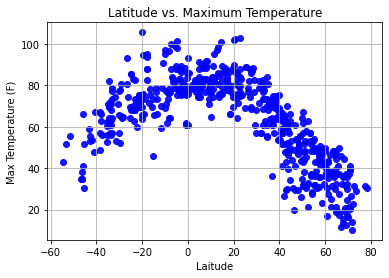

In [29]:

# Plot Latitude vs. Temperature:
latitudes = weather_df["Latitude"]
max_temps = weather_df["Max Temp"]

plt.scatter(latitudes, max_temps, marker = "o", facecolor = "blue", alpha = 0.9 )
plt.title("Latitude vs. Maximum Temperature")
plt.xlabel("Laitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)
plt.show()


#plt.xlim(14, 26)
#plt.ylim(33, 47)

## Latitude vs. Humidity Plot

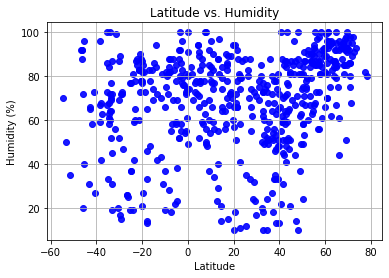

In [34]:
latitudes = weather_df["Latitude"]
humidity = weather_df["Humidity"]

plt.scatter(latitudes, humidity, marker = "o", facecolor = "blue", alpha = 0.9 )
plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.show()


## Latitude vs. Cloudiness Plot

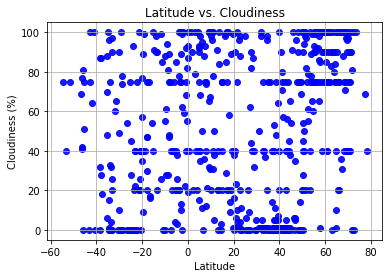

In [35]:
latitudes = weather_df["Latitude"]
cloudiness = weather_df["Cloudiness"]

plt.scatter(latitudes, cloudiness, marker = "o", facecolor = "blue", alpha = 0.9 )
plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
plt.show()

## Latitude vs. Wind Speed Plot

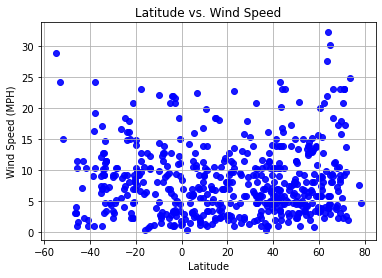

In [36]:
latitudes = weather_df["Latitude"]
wind_speed = weather_df["Wind Speed"]

plt.scatter(latitudes, wind_speed, marker = "o", facecolor = "blue", alpha = 0.9 )
plt.title("Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.grid(True)
plt.show()

## Linear Regression

In [24]:






# From previous project:
# Calculate the correlation coefficient and linear regression model 

#x_values = weight_avg
#y_values = tumor_avg
#(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#regress_values = x_values * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plt.scatter(x_values,y_values)
#plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(6,10),fontsize=15,color="red")
#plt.xlabel('Weight (grams)')
#plt.ylabel('Tumor Volume (mm3)')
#plt.xlim(14, 26)
#plt.ylim(33, 47)
#print(f" The correlation coefficient between weight and tumor volume is {round(st.pearsonr(weight_avg, tumor_avg)[0],2)}")
#print(f" The r-squared is: {rvalue**2}")
#plt.grid(True)
#plt.show()



####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


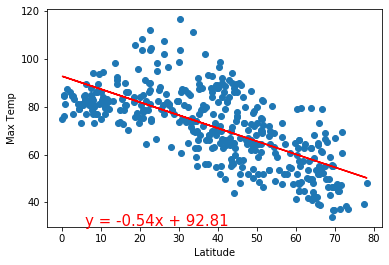

In [25]:
northern_cities = weather_df.loc[]

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


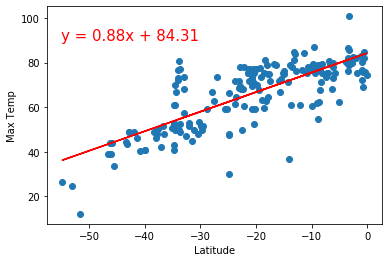

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


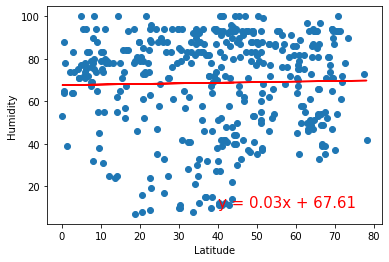

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


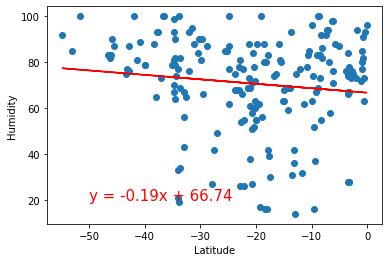

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


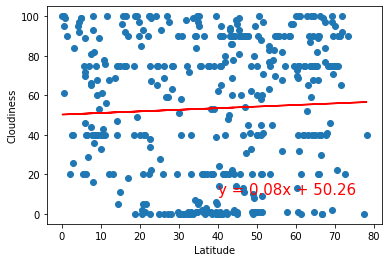

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


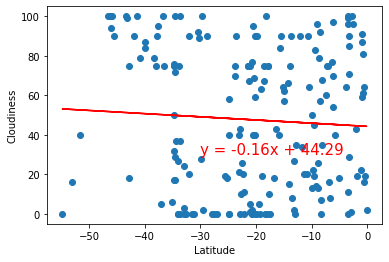

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


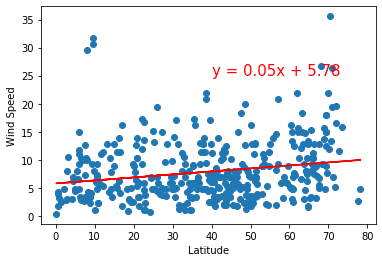

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


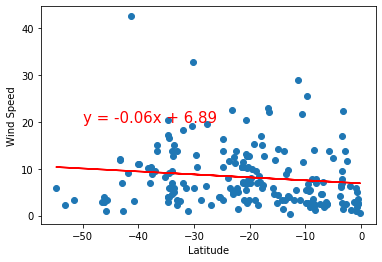